<a href="https://colab.research.google.com/github/lynntf/tdi_example/blob/main/tdi_example_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comparing data of income at the county level (irs data) and the instances of protests (ACLED data) to find trends between what kinds of communities are organizing or are being occupied by organized protests.

# Import data
Looking to load in files:

*   18incyallnoagi.csv -- This is from the [IRS](https://www.irs.gov/statistics/soi-tax-stats-county-data-2018).
*   18incyallagi.csv -- This is from the [IRS](https://www.irs.gov/statistics/soi-tax-stats-county-data-2018).
*   USA_2020_2021_Apr09.xlsx -- This is from [the ACLED US Crisis Monitor](https://acleddata.com/special-projects/us-crisis-monitor/) (they do not allow API access for free users so this file needs to be uploaded).

---

We are interested in correlating the frequency of protest actions (''political violence, demonstrations, and strategic developments'') with economic data such as gross income (AGI is the [adjusted gross income](https://www.irs.gov/e-file-providers/definition-of-adjusted-gross-income); that is, gross income including divideds etc. minus some adjustsments such as alimony, education, etc.) specifically to better understand the phenomenom of *signalling*. Demonstrations are intended to be viewed in a way to make change. How demonstrators choose to be viewed and the methods they use to that end are of interest to us. We seek to answer the following questions:

*   Who is the intended audience of the demonstration? Or intended victim of political violence?
    *   The people intended to be on the recieving end of a message or of violence are those that occupy the space surrounding the place of demonstration/violence. There are occasionally mismatches in the intended audience and the actual audience.
*   What tools are being used to convey the messages/actions that are the aim of the demonstration or action?



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 18incyallnoagi.csv to 18incyallnoagi.csv
Saving 18incyallagi.csv to 18incyallagi.csv
Saving USA_2020_2021_Apr09.xlsx to USA_2020_2021_Apr09.xlsx


In [ ]:
!ls

18incyallagi.csv  18incyallnoagi.csv  sample_data  USA_2020_2021_Apr09.xlsx


In [ ]:
import pandas as pd
protest_data = pd.read_excel('USA_2020_2021_Apr09.xlsx')
irs_data = pd.read_csv('18incyallnoagi.csv') # county irs data

# Description of the data
## ACLED

ACLED Columns, unimportant columns are struckthrough
*   ~~ISO -- Country in which the event took place~~ All USA
*   ~~EVENT_ID_CNTY -- Country plus event ID~~ All USA
*   ~~EVENT_ID_NO_CNTY -- event ID without country~~ Not relevant to analyses
*   EVENT_DATE -- Day, month and year. Each entry is one day, even if the event is longer
*   YEAR -- Year of the event
*   TIME_PRECISION -- 1: Exact date is recorded, 2: Week/end is recorded, 3: Month is recorded (month mid-point)
*   EVENT_TYPE 
  * ~~Battles~~ These do not seem to fit into any sort of demonstration category and all events in the data set appear to be shootings of some kind
  * ~~Explosions/remote violence~~ These are difficult to place in any sort of demonstration category, especially when motive is unknown (which seems to be the case for all of these).
  * ~~Violence against civilians~~ These do not seem to fit into any sort of demonstration category although they may result in demonstrations
  * ~~Strategic developments~~ These do not seem to fit into any sort of demonstration category
  * **Protests**
  * **Riots**
*   SUB_EVENT_TYPE -- Expanded information about the event type
*   ACTOR1/2 -- The actor(s) involved in the event. There is no difference between the two. Actor 2 may be blank if there is not other actor at an event
*   ASSOC_ACTOR_1/2 -- Associated/allied with primary actor. Identity of primary actor. Component force of primary actor.
*   INTER1/2 -- Describe the group type based on some vague criteria about the goals of the group. Potentially relevant here, but ultimately seems to be subjective.
    1. State forces
    2. Rebel groups
    3. Political militia
    4. Identity militia
    5. Rioters/mobs
    6. Protesters (peaceful and unarmed; i.e. there is no such thing as a protest by anyone armed according to this data, obviously subjective)
    7. Civilians (unarmed by definition)
    8. External/other forces
    0. Zero indicates a blank for ACTOR2
* INTERACTION -- Two digits of the INTER columns in increasing order
* REGION -- Continental subregion
* COUNTRY -- Country
* ADMIN1/2/~~3~~ -- First, second, and third order ''administrative division''. Here, this will be state, county, ~~some sort of subdivision (blank here)~~
* ~~LOCATION -- Specific location name of the event which can be city, town, village, neighborhood. Could be 'City - Neighborhood' or 'City'.~~ Can't be correlated with the data from the IRS which only contains location data as specific as the county.
* LATITUDE -- Latitude
* LONGITUDE -- Longitude (not specific enough to locate a block or street)
* ~~GEO_PRECISION~~ Won't be considerd in data analysis
  1. Specific town or village
  2. Small part of a region (sometimes just a town chosen from the region)
  3. Larger regional area
* ~~SOURCE -- Where the report comes from, possibly multiple sources separated by semicolons. Some of these are basically unsourced due to the lack of information about the source such as listing the source as ''Twitter''.~~
* ~~SOURCE_SCALE -- The scope of the report. Most granular level is reported.~~
* NOTES -- Written account of the event. Not relevant for strict data analysis, but very helpful in understanding data.
* FATALITIES -- Number of reported fatalities. If fatalities are reported but the number isn't given, then 3 is reported. These should be considered estimates.
* ~~TIMESTAMP -- Records the time that an event is uploaded into the data~~



In [ ]:
protest_data.head()

,ISO,EVENT_ID_CNTY,EVENT_ID_NO_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,ACTOR2,ASSOC_ACTOR_2,INTER2,INTERACTION,REGION,COUNTRY,ADMIN1,ADMIN2,ADMIN3,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TIMESTAMP
0,840,USA23416,23416,2020-01-01,2020,1,Protests,Peaceful protest,Protesters (United States),NaN,6,NaN,NaN,0,60,North America,United States,New York,Monroe,NaN,Rochester,43.155,-77.616,1,13WHAM ABC; Democrat and Chronicle; 10NBC,Subnational,"On 1 January 2020, people held a peace march o...",0,1612546518
1,840,USA23635,23635,2020-01-01,2020,1,Protests,Peaceful protest,Protesters (United States),BLM: Black Lives Matter,6,NaN,NaN,0,60,North America,United States,California,Alameda,NaN,Oakland,37.804,-122.271,1,KTVU Fox2,Subnational,"On 1 January 2020, a group of people gathered ...",0,1612546519
2,840,USA23488,23488,2020-01-01,2020,1,Protests,Peaceful protest,Protesters (United States),NaN,6,NaN,NaN,0,60,North America,United States,Florida,Palm Beach,NaN,West Palm Beach,26.710,-80.064,1,CBS12 (West Palm Beach); Crowd Counting Consor...,Other-Subnational,"On 1 January 2020, protesters assembled along ...",0,1612546518
3,840,USA23726,23726,2020-01-01,2020,1,Protests,Peaceful protest,Protesters (United States),NaN,6,NaN,NaN,0,60,North America,United States,Oklahoma,Oklahoma,NaN,Oklahoma City,35.466,-97.513,1,Oklahoma City Free Press,National,"On 1 January 2020, protesters against Oklahoma...",0,1612546519
4,840,USA23414,23414,2020-01-01,2020,1,Protests,Peaceful protest,Protesters (United States),NaN,6,NaN,NaN,0,60,North America,United States,New York,New York,NaN,New York - Manhattan,40.783,-73.966,1,CBS2 (New York),Subnational,"On 1 January 2020, protesters gathered at NYPD...",0,1612546519


In [ ]:
import requests as req

lat = 43.155
lon = -77.616

x = req.get('http://www.spatialjusticetest.org/api.php?fLat={}&fLon={}'.format(lat, lon))

In [ ]:
print(x.json()['income'])

57479


## IRS SOI Data
SOI (Statistics of income) Columns:

* STATEFIPS -- number associated with the state or territory, two digits
* STATE -- Two digit state abbreviation
* ~~CBSACODE -- Code to correlate with other data about metropoliton and micropolition areas~~
* ~~CBSATITLE~~
* ~~CBSASTATUS~~
* COUNTYFIPS -- Three digit county label
* COUNTYNAME -- Name of the county (typically ends in 'County'). Max is 18 digits, cut off after that.
* AGI_STUB -- If the data is split into stubs, then the stats for that row essentially refer to tax bracket. `0` is the label for the total value of all other stubs. I think the `0` is the one to target for now.
* N1 -- Number of returns
* MARS1/2/4 -- Single/Joint/Head of Household returns
* ~~ELF-N2~~
* NUMDEP -- Number of dependents
* ~~TOTAL_VITA-ELDERLY~~
* A00100 -- AGI (Adjusted Gross Income)
* A02650 -- Total income amount

I'm not sure that there's any other information that would be relevant here, but one could, and probably should look for correlations in the data. That would require combining the two datasets asymettrically both ways (add income data to protest data, and add protest data (aggregated) to the income data).

In [ ]:
irs_data.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01750,A01750,...,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,Alabama,0,2062010.0,866700.0,756360.0,394890.0,1869810.0,97990.0,1139390.0,1368530.0,4079460.0,1387360.0,46350.0,30520.0,15820.0,7270.0,401630.0,515520.0,124361450.0,2054840.0,125693998.0,1706830.0,87248133.0,538540.0,969953.0,274940.0,2175917.0,253120.0,1684440.0,282230.0,385171.0,360340.0,3246542.0,238650.0,5421086.0,498490.0,14446144.0,...,567600.0,1059318.0,13250.0,25067.0,252860.0,693275.0,89810.0,806534.0,98010.0,873324.0,33190.0,26196.0,1963700.0,17782443.0,481610.0,1348658.0,440450.0,1208046.0,364920.0,631413.0,124120.0,112554.0,31440.0,25372.0,1275330.0,13092538.0,1419720.0,14112810.0,30280.0,51999.0,39030.0,156011.0,392810.0,1801380.0,1614620.0,5450578.0,1581360.0,4771103.0,41550.0,661254.0
1,1,AL,1,Autauga County,0,24360.0,9670.0,10050.0,4020.0,22000.0,1310.0,11060.0,16970.0,49940.0,17170.0,480.0,150.0,310.0,20.0,4750.0,5660.0,1421008.0,24300.0,1433014.0,20560.0,1059239.0,7390.0,7151.0,3030.0,11548.0,2790.0,8518.0,3330.0,3342.0,3750.0,26796.0,2590.0,32160.0,6340.0,194819.0,...,7550.0,15741.0,120.0,196.0,2610.0,6548.0,900.0,7629.0,970.0,8183.0,350.0,261.0,23480.0,171844.0,4870.0,13304.0,4410.0,12008.0,3960.0,6874.0,1450.0,1317.0,320.0,230.0,15890.0,122224.0,17310.0,131036.0,160.0,127.0,270.0,743.0,4640.0,16492.0,19220.0,56946.0,18940.0,54557.0,360.0,2316.0
2,1,AL,3,Baldwin County,0,100970.0,42240.0,43370.0,12890.0,90270.0,5410.0,50160.0,59960.0,196030.0,58070.0,2020.0,250.0,1770.0,50.0,14910.0,31900.0,6932600.0,100560.0,7022633.0,77300.0,4314569.0,30680.0,59937.0,19140.0,143136.0,17560.0,103446.0,13590.0,19600.0,19570.0,250979.0,17730.0,414734.0,29300.0,961799.0,...,25080.0,53044.0,430.0,874.0,14790.0,45163.0,5750.0,51216.0,6420.0,56565.0,2170.0,1909.0,94020.0,961301.0,17010.0,43576.0,14830.0,37321.0,13030.0,22598.0,4220.0,3823.0,2120.0,2035.0,67430.0,796040.0,74350.0,858857.0,1830.0,3091.0,2620.0,8318.0,24360.0,137644.0,72730.0,237520.0,70150.0,198728.0,3300.0,38792.0
3,1,AL,5,Barbour County,0,9050.0,3640.0,2790.0,2490.0,8240.0,390.0,5970.0,5790.0,17900.0,6460.0,90.0,90.0,0.0,20.0,2300.0,2440.0,397058.0,9020.0,400492.0,7510.0,277667.0,2030.0,3044.0,990.0,5746.0,910.0,4592.0,750.0,756.0,1470.0,7461.0,850.0,12440.0,2090.0,52646.0,...,2370.0,3344.0,20.0,33.0,970.0,2104.0,360.0,3126.0,410.0,3548.0,130.0,92.0,8590.0,52592.0,3040.0,9079.0,2840.0,8310.0,2180.0,3692.0,580.0,525.0,100.0,58.0,4780.0,33020.0,5470.0,35972.0,30.0,50.0,60.0,262.0,1370.0,4588.0,7410.0,24417.0,7300.0,23585.0,130.0,670.0
4,1,AL,7,Bibb County,0,7830.0,2980.0,3160.0,1540.0,7020.0,400.0,4440.0,5400.0,16400.0,5810.0,30.0,30.0,0.0,0.0,1750.0,1760.0,403044.0,7800.0,405944.0,6620.0,296969.0,1560.0,1594.0,500.0,1776.0,430.0,1207.0,790.0,797.0,1190.0,7047.0,460.0,8172.0,1640.0,40186.0,...,2370.0,4612.0,70.0,114.0,870.0,1707.0,270.0,2554.0,290.0,2680.0,150.0,94.0,7450.0,46630.0,2040.0,5768.0,1880.0,5198.0,1570.0,2776.0,330.0,306.0,90.0,42.0,4740.0,35250.0,5320.0,37474.0,0.0,0.0,40.0,75.0,1250.0,8637.0,6370.0,19927.0,6300.0,19071.0,80.0,779.0


In [ ]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [ ]:
key = 'ADMIN1'
protest_data[key] = protest_data[key].apply(lambda x: us_state_abbrev.get(x))

In [ ]:
protest_data = protest_data.dropna(axis=0,subset=['ADMIN2'])

In [ ]:
key = 'ADMIN2'
for i in protest_data.index:
  try:
    if protest_data.loc[i][key][0:5] == 'Saint':
      print(protest_data.loc[i][key][6:])
      protest_data.at[i,key] = protest_data.loc[i][key][6:]
    if protest_data.loc[i][key] == 'St. Louis City':
      protest_data.at[i,key] = 'Louis city'
      print(protest_data.loc[i][key])

  except:
    print(protest_data.loc[i][key])

key = 'COUNTYNAME'
for i in irs_data.index:
  if irs_data.loc[i][key][0:3] == 'St.':
    irs_data.at[i,key] = irs_data.loc[i][key][4:]
    print(irs_data.loc[i][key])
  # if irs_data.loc[i,key].split(' ')[-1][:4] == 'Coun':
  #   irs_data.at[i,key] = irs_data.loc[i,key].split(' ')[:-1]

In [ ]:
key = 'ADMIN2'
for i in protest_data.index:
  try:
    if protest_data.loc[i][key][0:5] == 'Saint':
      print(protest_data.loc[i][key][6:])
      protest_data.at[i,key] = protest_data.loc[i][key][6:]
    if protest_data.loc[i][key] == 'St. Louis City':
      protest_data.at[i,key] = 'Louis city'
      print(protest_data.loc[i][key])

  except:
    print(protest_data.loc[i][key])

key = 'COUNTYNAME'
for i in irs_data.index:
  if irs_data.loc[i][key][0:3] == 'St.':
    irs_data.at[i,key] = irs_data.loc[i][key][4:]
    print(irs_data.loc[i][key])
  # if irs_data.loc[i,key].split(' ')[-1][:4] == 'Coun':
  #   irs_data.at[i,key] = irs_data.loc[i,key].split(' ')[:-1]

In [ ]:
print(irs_data[irs_data['STATE'] == 'MO']['COUNTYNAME'])

1507           Missouri
1508       Adair County
1509      Andrew County
1510    Atchison County
1511     Audrain County
             ...       
1618       Wayne County
1619     Webster County
1620       Worth County
1621      Wright County
1622         Louis city
Name: COUNTYNAME, Length: 116, dtype: object


In [ ]:
key = 'ADMIN2'
protest_data[key] = protest_data[key].apply(lambda x: str(x)[:3])

key = 'COUNTYNAME'
irs_data[key] = irs_data[key].apply(lambda x: str(x)[:3])

In [ ]:
irs_data.head()

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01750,A01750,...,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,Ala,0,2062010.0,866700.0,756360.0,394890.0,1869810.0,97990.0,1139390.0,1368530.0,4079460.0,1387360.0,46350.0,30520.0,15820.0,7270.0,401630.0,515520.0,124361450.0,2054840.0,125693998.0,1706830.0,87248133.0,538540.0,969953.0,274940.0,2175917.0,253120.0,1684440.0,282230.0,385171.0,360340.0,3246542.0,238650.0,5421086.0,498490.0,14446144.0,...,567600.0,1059318.0,13250.0,25067.0,252860.0,693275.0,89810.0,806534.0,98010.0,873324.0,33190.0,26196.0,1963700.0,17782443.0,481610.0,1348658.0,440450.0,1208046.0,364920.0,631413.0,124120.0,112554.0,31440.0,25372.0,1275330.0,13092538.0,1419720.0,14112810.0,30280.0,51999.0,39030.0,156011.0,392810.0,1801380.0,1614620.0,5450578.0,1581360.0,4771103.0,41550.0,661254.0
1,1,AL,1,Aut,0,24360.0,9670.0,10050.0,4020.0,22000.0,1310.0,11060.0,16970.0,49940.0,17170.0,480.0,150.0,310.0,20.0,4750.0,5660.0,1421008.0,24300.0,1433014.0,20560.0,1059239.0,7390.0,7151.0,3030.0,11548.0,2790.0,8518.0,3330.0,3342.0,3750.0,26796.0,2590.0,32160.0,6340.0,194819.0,...,7550.0,15741.0,120.0,196.0,2610.0,6548.0,900.0,7629.0,970.0,8183.0,350.0,261.0,23480.0,171844.0,4870.0,13304.0,4410.0,12008.0,3960.0,6874.0,1450.0,1317.0,320.0,230.0,15890.0,122224.0,17310.0,131036.0,160.0,127.0,270.0,743.0,4640.0,16492.0,19220.0,56946.0,18940.0,54557.0,360.0,2316.0
2,1,AL,3,Bal,0,100970.0,42240.0,43370.0,12890.0,90270.0,5410.0,50160.0,59960.0,196030.0,58070.0,2020.0,250.0,1770.0,50.0,14910.0,31900.0,6932600.0,100560.0,7022633.0,77300.0,4314569.0,30680.0,59937.0,19140.0,143136.0,17560.0,103446.0,13590.0,19600.0,19570.0,250979.0,17730.0,414734.0,29300.0,961799.0,...,25080.0,53044.0,430.0,874.0,14790.0,45163.0,5750.0,51216.0,6420.0,56565.0,2170.0,1909.0,94020.0,961301.0,17010.0,43576.0,14830.0,37321.0,13030.0,22598.0,4220.0,3823.0,2120.0,2035.0,67430.0,796040.0,74350.0,858857.0,1830.0,3091.0,2620.0,8318.0,24360.0,137644.0,72730.0,237520.0,70150.0,198728.0,3300.0,38792.0
3,1,AL,5,Bar,0,9050.0,3640.0,2790.0,2490.0,8240.0,390.0,5970.0,5790.0,17900.0,6460.0,90.0,90.0,0.0,20.0,2300.0,2440.0,397058.0,9020.0,400492.0,7510.0,277667.0,2030.0,3044.0,990.0,5746.0,910.0,4592.0,750.0,756.0,1470.0,7461.0,850.0,12440.0,2090.0,52646.0,...,2370.0,3344.0,20.0,33.0,970.0,2104.0,360.0,3126.0,410.0,3548.0,130.0,92.0,8590.0,52592.0,3040.0,9079.0,2840.0,8310.0,2180.0,3692.0,580.0,525.0,100.0,58.0,4780.0,33020.0,5470.0,35972.0,30.0,50.0,60.0,262.0,1370.0,4588.0,7410.0,24417.0,7300.0,23585.0,130.0,670.0
4,1,AL,7,Bib,0,7830.0,2980.0,3160.0,1540.0,7020.0,400.0,4440.0,5400.0,16400.0,5810.0,30.0,30.0,0.0,0.0,1750.0,1760.0,403044.0,7800.0,405944.0,6620.0,296969.0,1560.0,1594.0,500.0,1776.0,430.0,1207.0,790.0,797.0,1190.0,7047.0,460.0,8172.0,1640.0,40186.0,...,2370.0,4612.0,70.0,114.0,870.0,1707.0,270.0,2554.0,290.0,2680.0,150.0,94.0,7450.0,46630.0,2040.0,5768.0,1880.0,5198.0,1570.0,2776.0,330.0,306.0,90.0,42.0,4740.0,35250.0,5320.0,37474.0,0.0,0.0,40.0,75.0,1250.0,8637.0,6370.0,19927.0,6300.0,19071.0,80.0,779.0


In [ ]:
n1 = []
agi = []
for i in protest_data.index:
  try:
    n1.append(irs_data[(protest_data.loc[i]['ADMIN1'] == irs_data['STATE']) & (protest_data.loc[i]['ADMIN2'] == irs_data['COUNTYNAME']) & (irs_data['COUNTYFIPS'] != 0)]['N1'].values[0])
    agi.append(irs_data[(protest_data.loc[i]['ADMIN1'] == irs_data['STATE']) & (protest_data.loc[i]['ADMIN2'] == irs_data['COUNTYNAME']) & (irs_data['COUNTYFIPS'] != 0)]['A00100'].values[0])
  except:
    print(protest_data.loc[i]['ADMIN1'], protest_data.loc[i]['ADMIN2'])
    n1.append(0)
    agi.append(0)

LA La 
LA La 
MO  Ge


In [ ]:
irs_data[(protest_data.loc[i]['ADMIN1'] == irs_data['STATE']) & (protest_data.loc[i]['ADMIN2'] == irs_data['COUNTYNAME'])]

,STATEFIPS,STATE,COUNTYFIPS,COUNTYNAME,AGI_STUB,N1,MARS1,MARS2,MARS4,ELF,CPREP,PREP,DIR_DEP,N2,NUMDEP,TOTAL_VITA,VITA,TCE,VITA_EIC,RAC,ELDERLY,A00100,N02650,A02650,N00200,A00200,N00300,A00300,N00600,A00600,N00650,A00650,N00700,A00700,N00900,A00900,N01000,A01000,N01750,A01750,...,N07225,A07225,N07260,A07260,N09400,A09400,N85770,A85770,N85775,A85775,N09750,A09750,N10600,A10600,N59660,A59660,N59720,A59720,N11070,A11070,N10960,A10960,N11560,A11560,N06500,A06500,N10300,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
63,1,AL,125,Tus,0,83000.0,36730.0,27470.0,16970.0,74850.0,3740.0,41560.0,55630.0,160770.0,56040.0,1970.0,1310.0,660.0,480.0,16940.0,18600.0,5033282.0,82790.0,5084217.0,70800.0,3521527.0,21120.0,37476.0,10400.0,83949.0,9560.0,65522.0,11510.0,16252.0,13520.0,87357.0,8880.0,214734.0,18380.0,537491.0,...,23580.0,43700.0,710.0,1463.0,8470.0,24279.0,2860.0,21532.0,3190.0,23705.0,1200.0,931.0,79500.0,719045.0,19200.0,54280.0,17790.0,50661.0,14660.0,25429.0,5810.0,5261.0,980.0,703.0,51490.0,537664.0,55780.0,574525.0,1110.0,1876.0,1570.0,6662.0,15520.0,80516.0,65570.0,223047.0,63980.0,189235.0,1980.0,33813.0


In [ ]:
protest_data['N1'] = n1
protest_data['AGI'] = agi

In [ ]:
protest_data['agiDn1'] = protest_data['AGI']/protest_data['N1']

In [ ]:
print(protest_data['SUB_EVENT_TYPE'].unique())

['Peaceful protest' 'Other' 'Protest with intervention'
 'Change to group/activity' 'Arrests' 'Attack' 'Mob violence'
 'Looting/property destruction' 'Excessive force against protesters'
 'Violent demonstration' 'Disrupted weapons use' 'Armed clash'
 'Sexual violence' 'Remote explosive/landmine/IED' 'Suicide bomb'
 'Grenade']


In [ ]:
q = []
p = []
r = []
for s in protest_data['ADMIN1'].unique():
  for c in protest_data[protest_data['ADMIN1'] == s]['ADMIN2'].unique():
    t = protest_data[(protest_data['ADMIN1'] == s) & (protest_data['ADMIN2'] == c)]['SUB_EVENT_TYPE']
    try:
      x = t.value_counts()['Peaceful protest']/len(t)
      y = irs_data[(s == irs_data['STATE']) & 
                (c == irs_data['COUNTYNAME']) & 
                (irs_data['COUNTYFIPS'] != 0)]['A00100'].values[0] \
                /irs_data[(s == irs_data['STATE']) & 
                       (c == irs_data['COUNTYNAME']) & 
                       (irs_data['COUNTYFIPS'] != 0)]['N1'].values[0]
      z = len(t)
      q.append(x)
      p.append(y)
      r.append(z)
    except:
      pass

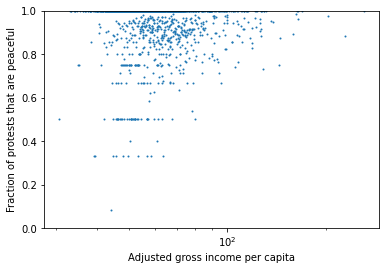

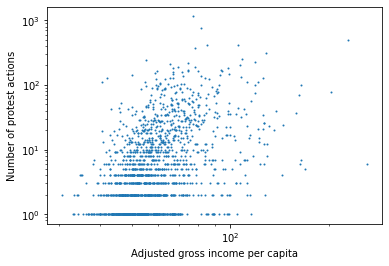

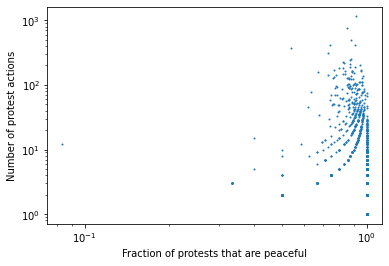

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(p,q, s=1)
plt.ylabel('Fraction of protests that are peaceful')
plt.xlabel('Adjusted gross income per capita')
# plt.xlim((0,2e8))
plt.ylim(0,1)
plt.xscale('log')

plt.figure()
plt.scatter(p,r, s=1)
plt.ylabel('Number of protest actions')
plt.xlabel('Adjusted gross income per capita')
plt.yscale('log')
plt.xscale('log')

plt.figure()
plt.scatter(q,r, s=1)
plt.ylabel('Number of protest actions')
plt.xlabel('Fraction of protests that are peaceful')
plt.yscale('log')
plt.xscale('log')

In [ ]:
# These plots aren't as informative as they could be since there are lots of lost data points in the scatter plots. Histograms might show this better
plt.hist()